# Intorduction

This is advertising expenditures dataset. 

I will use this dataset to predict the future sales based on advertising channels

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv('Advertising.csv', usecols = [1,2,3,4])

# Data overview

This dataset is high usability and clean - it does not have any null values so I can jump right into vizualization

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info() #stulpeliu duomenu tipai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum() #patikrinam kiek nulliu

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# Data vizualization

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Exploring correlations

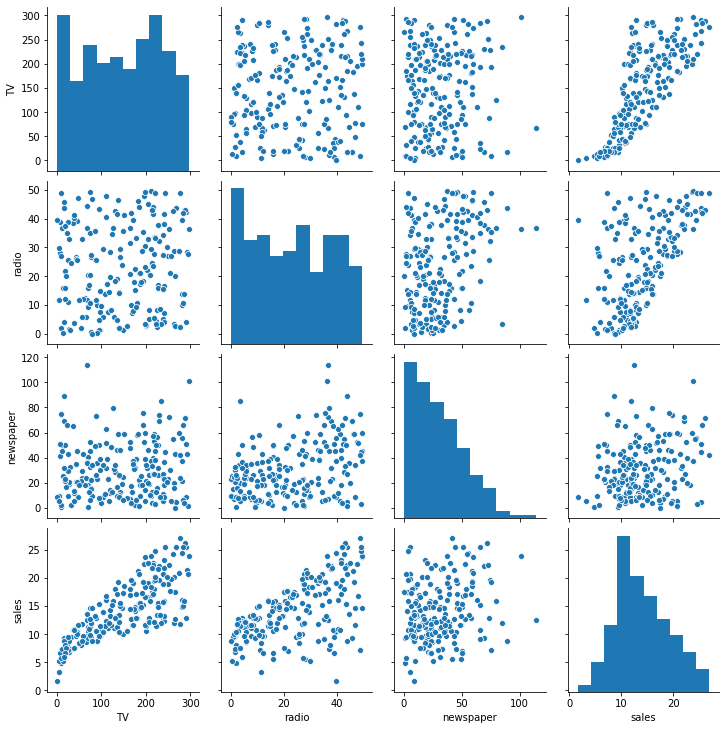

In [22]:
sns.pairplot(df)

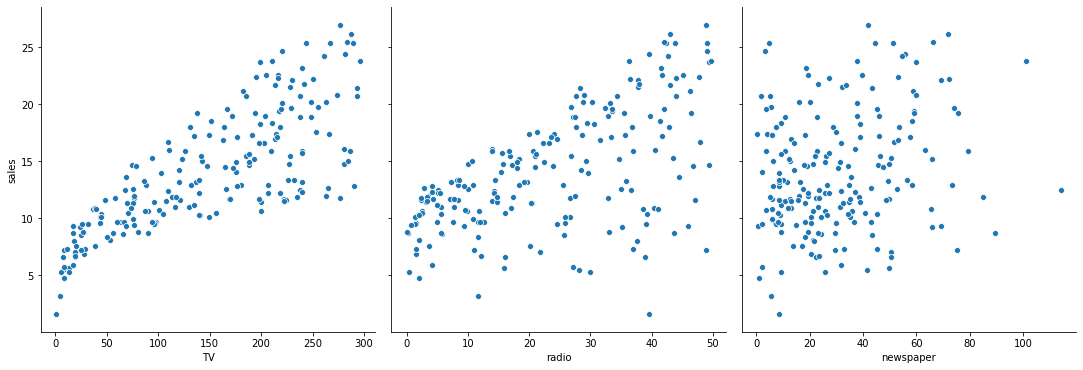

In [12]:
sns.pairplot(df,
            y_vars = ['sales'],
            x_vars = ['TV', 'radio', 'newspaper'],
            height = 5)

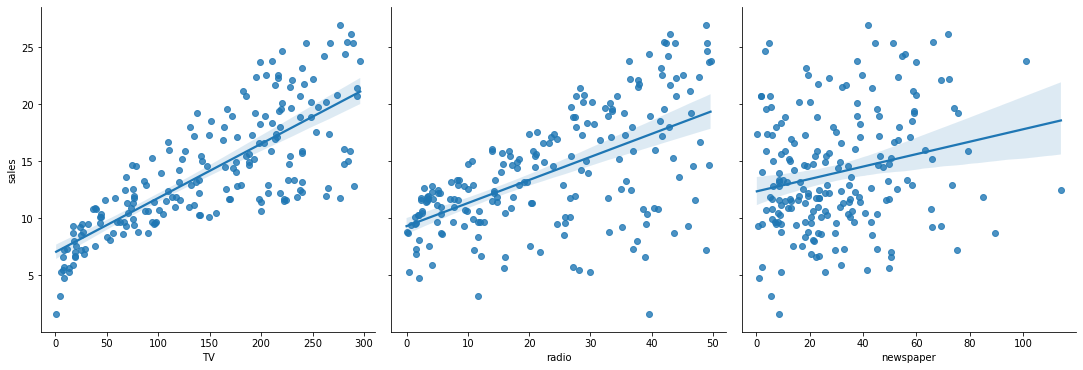

In [13]:
sns.pairplot(df,
            y_vars = ['sales'],
            x_vars = ['TV', 'radio', 'newspaper'],
            height = 5,
            kind = 'reg')

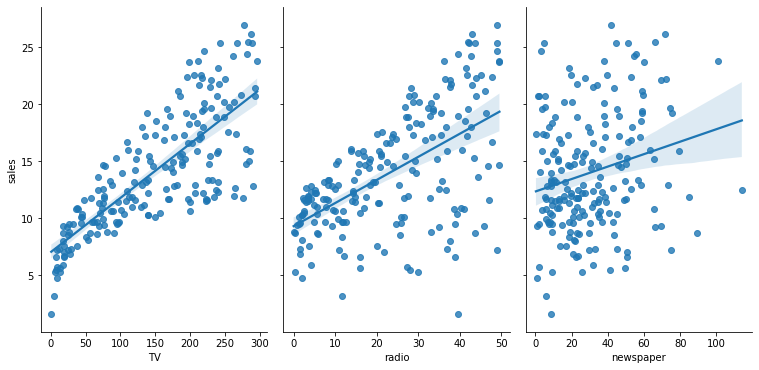

In [14]:
sns.pairplot(df,
            y_vars = ['sales'],
            x_vars = ['TV', 'radio', 'newspaper'],
            height = 5,
            kind = 'reg',
            aspect = 0.7)

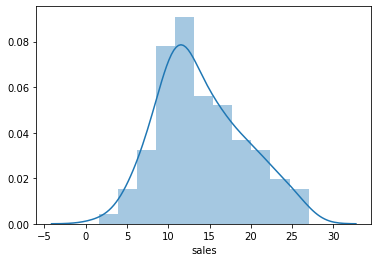

In [15]:
sns.distplot(df['sales']) #linija yra probability density function .apibendrina sarysi tarp kintamuju issidestymo. 
#PDF. taskas per kuri eina ta linija tai integralas nuo a iki b

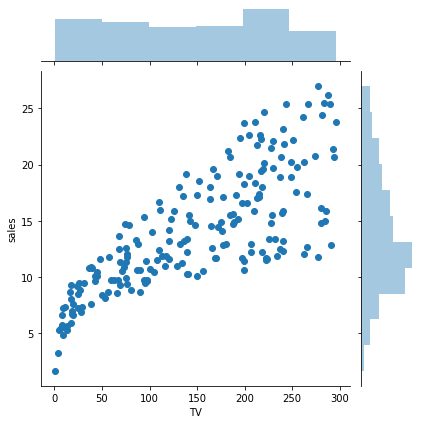

In [16]:
sns.jointplot(data = df, x = 'TV', y = 'sales') #galim pamatyt kad sales susikoncentrave tarp 10 ir 12

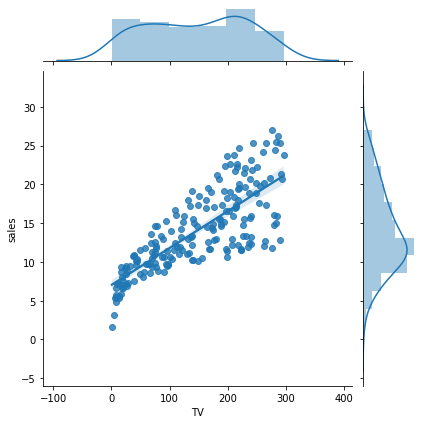

In [17]:
sns.jointplot(data = df, x = 'TV', y = 'sales', kind = 'reg')

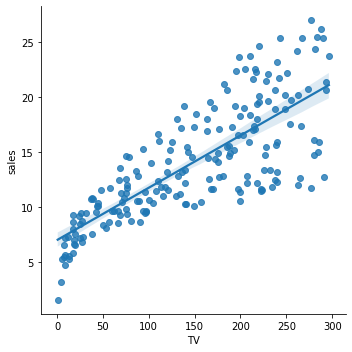

In [18]:
sns.lmplot(data = df, x = 'TV', y = 'sales')

In [19]:
#BLUE - best linear unbiased estimates

In [20]:
df.corr() #pearsono koreliacija - kuo arciau vieno tuo labiau koreliuoja

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


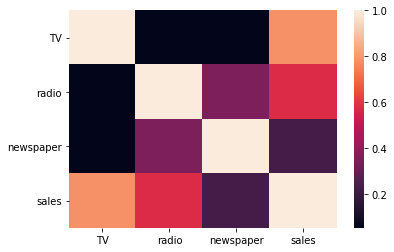

In [24]:
sns.heatmap(df.corr())

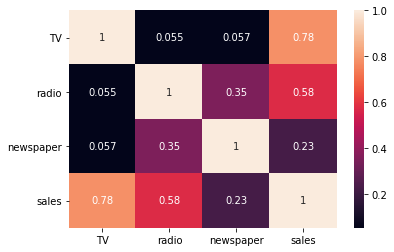

In [27]:
sns.heatmap(df.corr(), annot = True)

# Data prognostic model


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
feature_cols = ['TV', 'radio', 'newspaper']

In [85]:
X = df[feature_cols]
y = df['sales']

In [86]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [88]:
y_test.shape

(40,)

In [89]:
linear = LinearRegression()

In [90]:
linear.fit(X_train, y_train) 
r_sq = linear.score(X_test, y_test) 


In [91]:
print(r_sq)

0.9248554085096389


In [92]:
print(linear.intercept_) #B0
print(linear.coef_) # other B's

2.9161315415796896
[ 0.04595888  0.18995969 -0.00294364]


In [93]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [94]:
coeff_df = pd.DataFrame(linear.coef_, X.columns, columns = ['Coefficients']) 


In [95]:
coeff_df

,Coefficients
TV,0.045959
radio,0.189960
newspaper,-0.002944


In [96]:
coeff_df.columns

Index(['Coefficients'], dtype='object')

In [97]:
predictions = linear.predict(X_test)

In [98]:
predictions #cia yra y kintamojo predictions, padavus kelis Xus

array([ 6.49436439,  8.46763183, 15.10977332, 23.73350658, 12.77409203,
       13.51024254,  9.64800915, 11.43367018, 14.76641979, 21.62618015,
        9.9761882 , 12.52177734, 20.80185443, 21.6662424 ,  7.5799645 ,
       19.2487838 ,  6.00519353, 15.14489899, 17.76539128,  8.11899295,
        7.85126983, 10.13734822, 13.94297217, 17.35820234, 21.16791681,
       13.82622756, 15.52873184, 13.74468675, 21.13917919,  8.82420363,
        6.57495186, 17.55203335,  6.39714307, 12.53020489,  5.69185681,
       18.41060436,  8.46290807,  8.41992948, 10.35968692, 13.35111078])

In [99]:
y_test #tikri ygrikai

182     8.7
56      5.5
123    15.2
198    25.5
57     13.2
161    13.3
186    10.3
80     11.8
103    14.7
30     21.4
157    10.1
190    10.8
15     22.4
42     20.7
32      9.6
133    19.6
189     6.7
45     14.9
70     18.3
24      9.7
65      9.3
82     11.3
43     12.9
74     17.0
93     22.2
77     14.2
131    12.7
174    11.5
69     22.3
44      8.5
127     8.8
3      18.5
22      5.6
9      10.6
60      8.1
14     19.0
132     5.7
191     9.9
72      8.8
167    12.2
Name: sales, dtype: float64

In [100]:
y_test - predictions #tikrieji pardavimai minus spejamieji

182    2.205636
56    -2.967632
123    0.090227
198    1.766493
57     0.425908
161   -0.210243
186    0.651991
80     0.366330
103   -0.066420
30    -0.226180
157    0.123812
190   -1.721777
15     1.598146
42    -0.966242
32     2.020036
133    0.351216
189    0.694806
45    -0.244899
70     0.534609
24     1.581007
65     1.448730
82     1.162652
43    -1.042972
74    -0.358202
93     1.032083
77     0.373772
131   -2.828732
174   -2.244687
69     1.160821
44    -0.324204
127    2.225048
3      0.947967
22    -0.797143
9     -1.930205
60     2.408143
14     0.589396
132   -2.762908
191    1.480071
72    -1.559687
167   -1.151111
Name: sales, dtype: float64

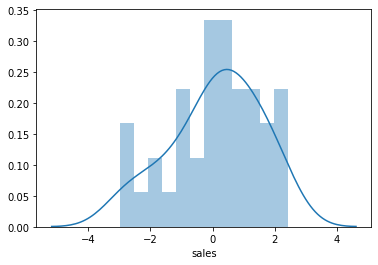

In [103]:
sns.distplot(y_test - predictions, bins = 12)

# Variables analysis

In [104]:
import statsmodels.formula.api as smf

In [105]:
estimates = smf.ols('sales ~ TV + radio', df).fit()

In [106]:
estimates.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           4.83e-98
Time:                        20:16:58   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusions

This Linear Regression model can accurately predict future sales based on TV and radio expenditures